In [1]:
import pandas as pd
import ast
from tqdm import tqdm
from itertools import combinations
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.7/807.7 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 44.1 MB/s eta 0:00:00


In [3]:
from pymatgen.ext.matproj import MPRester

In [4]:
api_key = MPRester("HQuPGqOEddQe0NMWXa8ozKpP9CYpecZ8")

In [5]:
data = api_key.summary.search(elements=['H'])

In [6]:
# Extracting required info.
extracted_data = []
for entry in data:
    extracted_entry = {
        'elements': entry['elements'],
        'nelements': entry['nelements'],
        'formula_pretty': entry['formula_pretty'],
        'material_id': entry['material_id']
    }
    extracted_data.append(extracted_entry)

df = pd.DataFrame(extracted_data)
print(df)

                       elements  nelements          formula_pretty material_id
0                   [As, H, Sr]          3                 Sr5As3H    mp-24338
1                 [Cs, H, O, S]          4                  CsHSO4   mp-557752
2                 [B, H, Na, O]          4                Na2B3HO6   mp-706631
3          [B, Co, H, O, P, Pb]          6              CoBP2HPbO9  mp-1193243
4                    [Fe, H, O]          3                   FeHO2   mp-510670
...                         ...        ...                     ...         ...
10389          [C, H, O, Sn, V]          5        V8Sn16H85(C8O9)4   mp-705959
10390         [C, H, O, Si, Zn]          5      Zn3Si14H90(C15O2)2  mp-1200390
10391      [As, C, Ga, H, O, S]          6   Ga8As16H102C32(S12O)3  mp-1228185
10392  [B, C, Cl, H, Hg, N, Sn]          7  Sn4HgB44H124C24(N4Cl)2  mp-1200316
10393         [C, Ga, H, S, Si]          5        Ga4Si12H138C55S4  mp-1197409

[10394 rows x 4 columns]


In [7]:
df.to_csv('/content/drive/MyDrive/EN_population/H_mp_data.csv', index=False)

In [15]:
df = pd.read_csv('/content/drive/MyDrive/EN_population/H_mp_data.csv')

In [16]:
population=[]

In [17]:
element_counts = df['nelements'].unique()
element_counts = sorted(element_counts)

dfs_by_nelements = {}

for i in element_counts:
    current_df = df[df['nelements'] == i].copy()
    population.append(len(current_df))
    dfs_by_nelements[f"df_{i}"] = current_df
    globals()[f'df_{i}'] = dfs_by_nelements[f"df_{i}"]

In [18]:
labels=element_counts
sizes=population

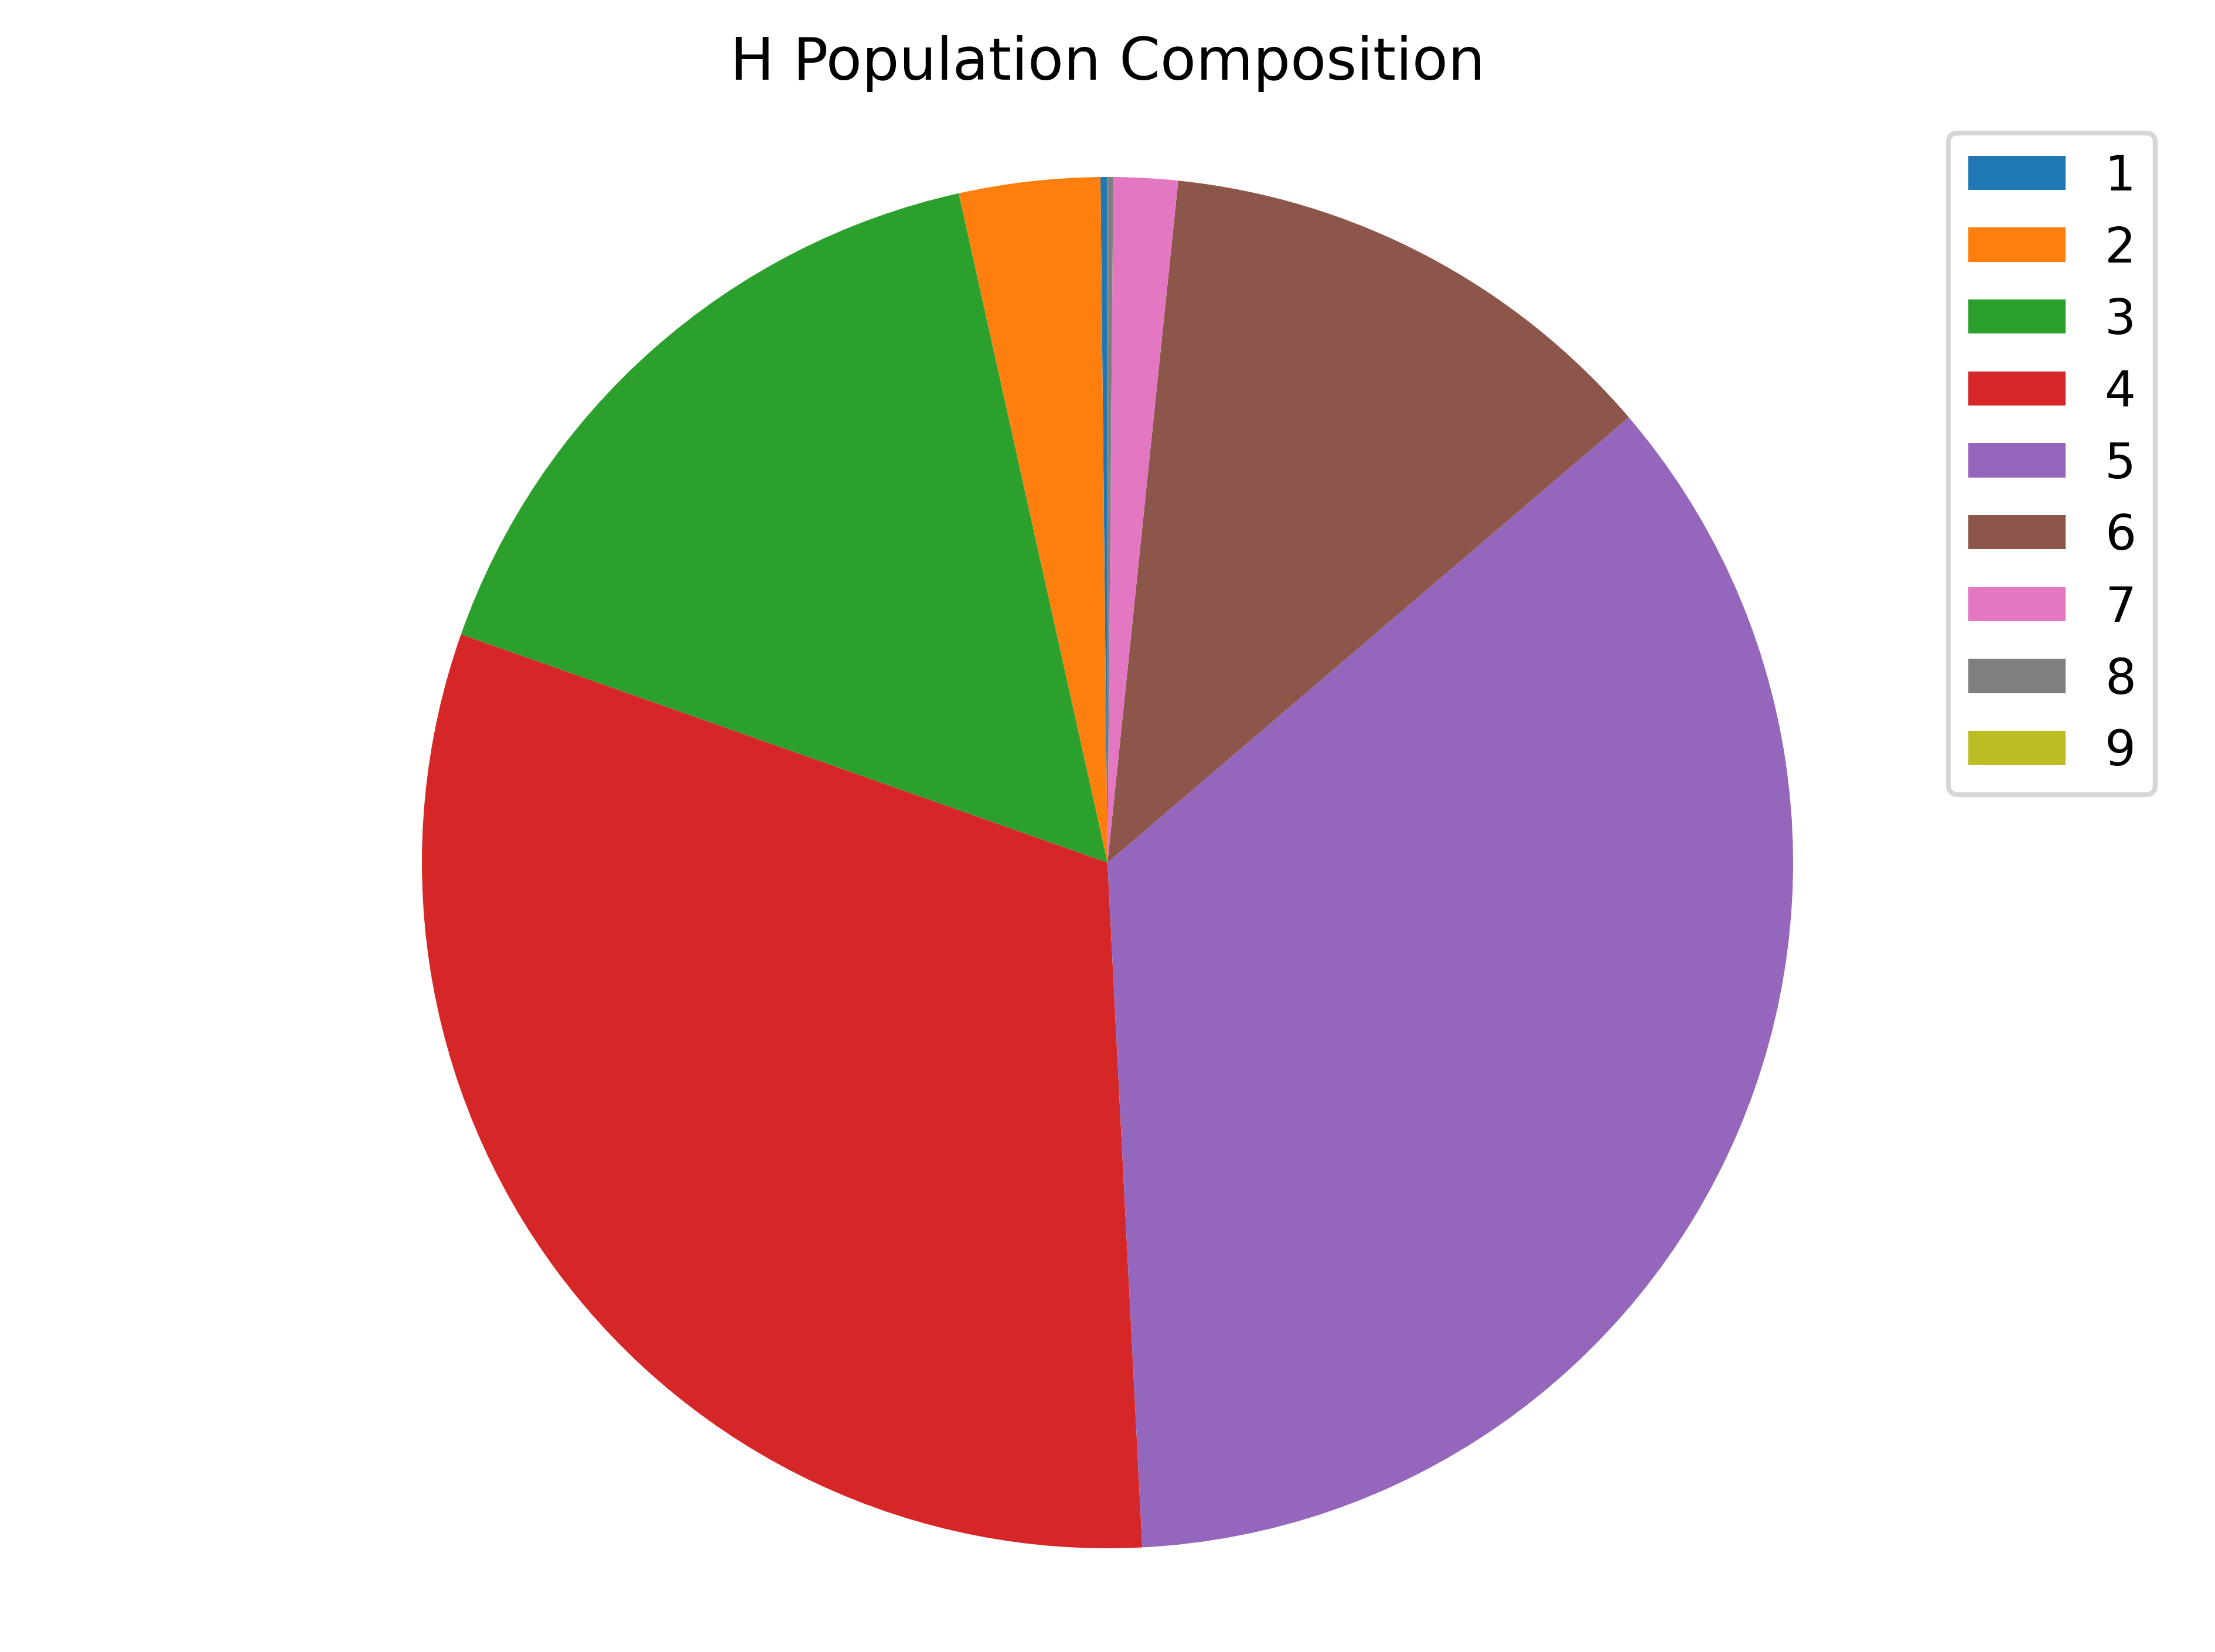

In [19]:
fig = plt.figure(dpi=600)
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('H Population Composition')
plt.tight_layout()
plt.show()

In [20]:
element_en = pd.read_excel("/content/drive/MyDrive/EN_population/Element-OganovEN.xlsx")

element_dict = dict(zip(element_en['Elements'], element_en['Electronegativity']))

In [21]:
def calculate_material_en_difference(dataframe):
  average=[]
  for i in range(len(dataframe)):
    test_list_str = dataframe.iloc[i,0]
    test_list = ast.literal_eval(test_list_str)
    temp = combinations(test_list,2)
    sum_differences = 0
    t=list(temp)
    pair_count = len(t)
    for k in t:
      element1 = k[0]
      element2 = k[1]
      #print(element1, element2)
      if all(key in element_dict for key in (element1, element2)):
        electronegativity1 = element_dict[element1]
        electronegativity2 = element_dict[element2]
        difference = abs(electronegativity1 - electronegativity2)
        sum_differences += difference
    if pair_count == 0:
      avg= 0
    else:
      avg=sum_differences/pair_count
    average.append(avg)

  return average

In [22]:
mean_values = []

for i in tqdm(element_counts):
    df_current = globals()[f'df_{i}']
    df_current['material_en_diff'] = calculate_material_en_difference(df_current)
    df_current.to_csv(f'/content/drive/MyDrive/EN_population/H_df_{i}.csv', index=False)
    mean_values.append(globals()[f'df_{i}']['material_en_diff'].mean())


100%|██████████| 9/9 [00:00<00:00, 14.05it/s]


In [23]:
output_file = '/content/drive/MyDrive/EN_population/H_dataframes.txt'
connect=[]

with open(output_file, 'w') as file:
  for i in element_counts:
    key = f'df_{i}'
    connect.append(key)
    current_df = dfs_by_nelements[key]
    print(f"DataFrame {key} has size: {current_df.shape}")
    print(f"DataFrame {key} has size: {current_df.shape}", file=file)

print(f"Details saved to {output_file}")

DataFrame df_1 has size: (17, 5)
DataFrame df_2 has size: (345, 5)
DataFrame df_3 has size: (1675, 5)
DataFrame df_4 has size: (3244, 5)
DataFrame df_5 has size: (3684, 5)
DataFrame df_6 has size: (1258, 5)
DataFrame df_7 has size: (157, 5)
DataFrame df_8 has size: (13, 5)
DataFrame df_9 has size: (1, 5)
Details saved to /content/drive/MyDrive/EN_population/H_dataframes.txt


In [24]:
dict = {'mean electronegativity difference': mean_values}

In [26]:
EN_diff_values = pd.DataFrame(dict)

In [27]:
EN_diff_values.to_csv('/content/drive/MyDrive/EN_population/H_EN_diff_values.csv')

In [28]:
n=max(element_counts)

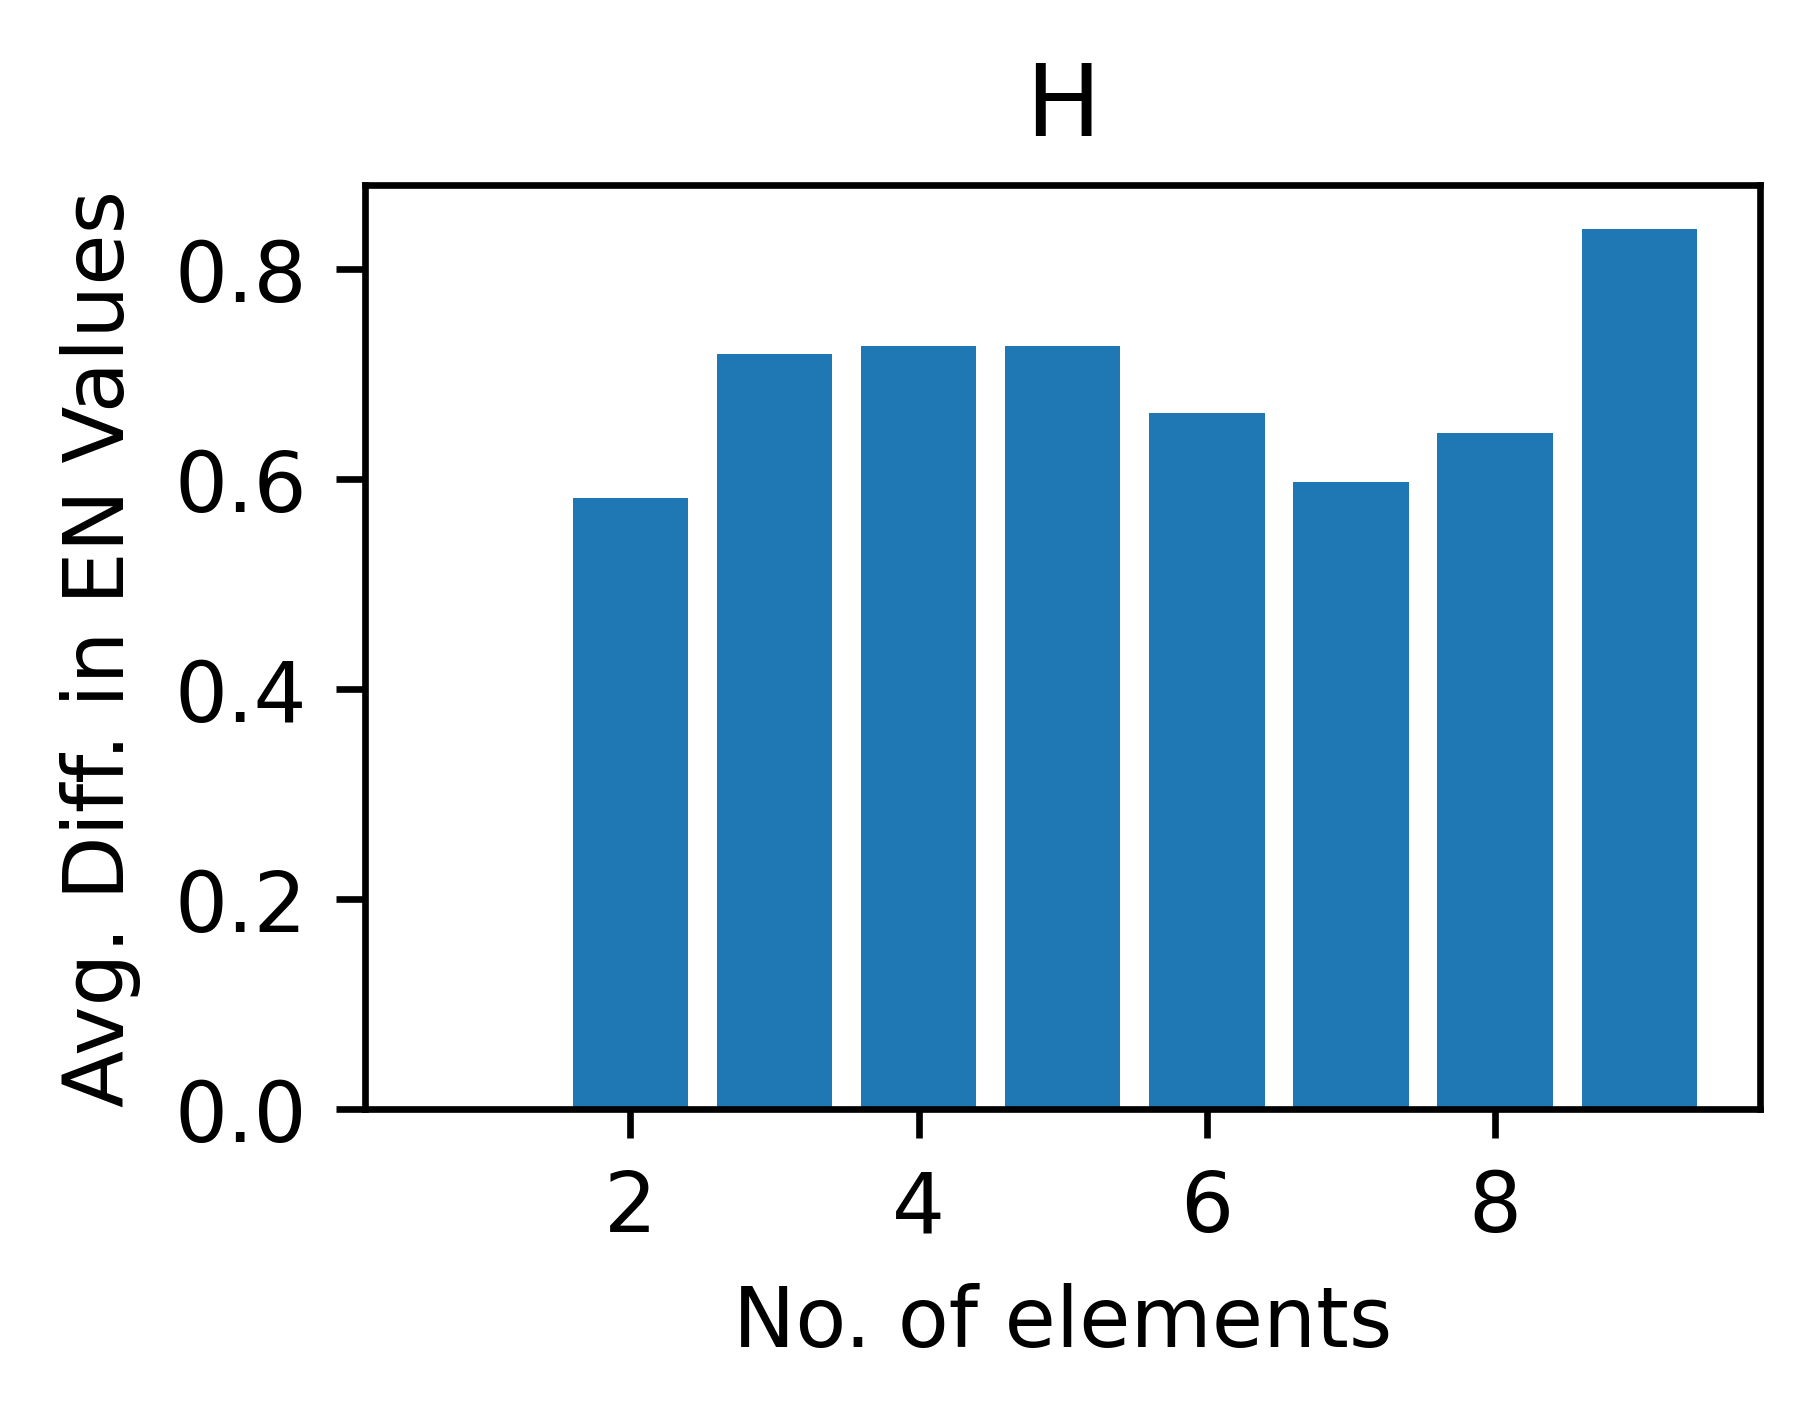

In [29]:
fig = plt.figure(figsize=(3,2),dpi=600)
plt.bar(range(1, n+1), mean_values)
plt.xlabel('No. of elements')
plt.ylabel('Avg. Diff. in EN Values')
plt.title('H')
plt.show()